# SENTIMENT ANALYSIS ON INVESTMENTS AND SAVINGS

### AIM: To identify and extract opinions on Investments and savings.

### Methodology : 
### 1) Clean and Preprocess text data using regular expressions and NLTK
### 2) Visualization using word cloud
### 3)  Performing sentiment analysis using SentimentIntensityAnalyzer model

### Conclusion: Based on the visualization of the data set, it can be seen that idea on savings and investments is widely accepted.

In [1]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import string
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA # Using SentimentIntensityAnalyzer for analyzing the sentiments in the text data.


C:\Users\Kenechi\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Load text data

In [2]:
invest = pd.read_csv('investments.txt', sep = '.', names = ["Reviews", "Nan"])

In [3]:
# viewing the first five rows.
invest.head()

,Reviews,Nan
0,"It's hard to save money as a teenager, particu...",
1,The article is part of a series where adolesce...,
2,At Money Under 30 we agree that being financia...,NaN
3,"You have big dreams as a kid, whether it's a n...",
4,Your parents may help you get some of these th...,NaN


In [4]:
# Length of text data.
invest.Reviews.value_counts().sum()

116

In [5]:
# Drop the Nan column, because it is irrelevant.
invest.drop(['Nan'], axis = 1, inplace = True)

# Data cleaning and text preprocessing

In [6]:
# Removing all the numbers in the data because it does not add much infomation to the analysis.
no_numbers = []
for i in invest['Reviews']:
    hold = re.sub('\w*\d\w*', '', i)
    no_numbers.append(hold)
invest['no_numbers'] = no_numbers
invest.head() # displays the first five lines.

,Reviews,no_numbers
0,"It's hard to save money as a teenager, particu...","It's hard to save money as a teenager, particu..."
1,The article is part of a series where adolesce...,The article is part of a series where adolesce...
2,At Money Under 30 we agree that being financia...,At Money Under we agree that being financiall...
3,"You have big dreams as a kid, whether it's a n...","You have big dreams as a kid, whether it's a n..."
4,Your parents may help you get some of these th...,Your parents may help you get some of these th...


In [7]:
# Converting the reviews to lower cases because data is case sensitive
lower_case =[]
for i in invest['no_numbers']:
    hold = i.lower()
    lower_case.append(hold)

invest['lower_case'] = lower_case
invest.head()

,Reviews,no_numbers,lower_case
0,"It's hard to save money as a teenager, particu...","It's hard to save money as a teenager, particu...","it's hard to save money as a teenager, particu..."
1,The article is part of a series where adolesce...,The article is part of a series where adolesce...,the article is part of a series where adolesce...
2,At Money Under 30 we agree that being financia...,At Money Under we agree that being financiall...,at money under we agree that being financiall...
3,"You have big dreams as a kid, whether it's a n...","You have big dreams as a kid, whether it's a n...","you have big dreams as a kid, whether it's a n..."
4,Your parents may help you get some of these th...,Your parents may help you get some of these th...,your parents may help you get some of these th...


In [8]:
# Removing Punctuations, they dont add relevant information.
import string
Final_form = []
for i in invest['lower_case'] :
    hold = re.sub('[%s]'%re.escape(string.punctuation), ' ',str(i))
    Final_form.append(hold)
    
invest['Final_form'] = Final_form
invest.head()

,Reviews,no_numbers,lower_case,Final_form
0,"It's hard to save money as a teenager, particu...","It's hard to save money as a teenager, particu...","it's hard to save money as a teenager, particu...",it s hard to save money as a teenager particu...
1,The article is part of a series where adolesce...,The article is part of a series where adolesce...,the article is part of a series where adolesce...,the article is part of a series where adolesce...
2,At Money Under 30 we agree that being financia...,At Money Under we agree that being financiall...,at money under we agree that being financiall...,at money under we agree that being financiall...
3,"You have big dreams as a kid, whether it's a n...","You have big dreams as a kid, whether it's a n...","you have big dreams as a kid, whether it's a n...",you have big dreams as a kid whether it s a n...
4,Your parents may help you get some of these th...,Your parents may help you get some of these th...,your parents may help you get some of these th...,your parents may help you get some of these th...


In [9]:
# Since we have cleaned the data to the it's useable form we will drop the other columns and make use of just "Final_form" column.
invest.drop(['Reviews'], axis = 1, inplace = True)
invest.drop(['no_numbers'], axis = 1, inplace = True)
invest.drop(['lower_case'], axis = 1, inplace = True)

In [10]:
# Displaying the first five rows.
invest.head()

,Final_form
0,it s hard to save money as a teenager particu...
1,the article is part of a series where adolesce...
2,at money under we agree that being financiall...
3,you have big dreams as a kid whether it s a n...
4,your parents may help you get some of these th...


In [11]:
tokenizer = RegexpTokenizer(r'\w+') # seperates every sentence into individual words


In [12]:
# Removes Stopwords(removing words that have little or no meaning in the text data that occur frequently. examples: is,and,the,a, so on.)
stopwords = stopwords.words('english') 
investment = list(invest.Final_form)
token = []
for words in investment:
    toks = tokenizer.tokenize(words)
    toks= [t.lower() for t in toks if t.lower() not in stopwords]
    token.extend(toks) # adds the content of a list into another list

In [13]:
# Shows you the top 5 frequent the words and how much the occur.
word_frequency = nltk.FreqDist(token)
word_frequency.most_common(5)

[('money', 21), ('savings', 18), ('account', 16), ('pension', 15), ('get', 12)]

# Visualizing with word clouds

 ### word cloud is used in depicting key words in a corpus of text. It also gives a wonderful visualization of the text data,the more frequent a word is used in the text, the bigger in size it appears.we could also use word cloud to know the kind of words being used around or associated with  the word 'Savings and investments'.

In [14]:
# create a fucntion to implement word cloud.
def wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="black").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()

In [15]:
# Convert  reviews to string format.
str_ = ''
for i in invest.Final_form:
    str_ += i

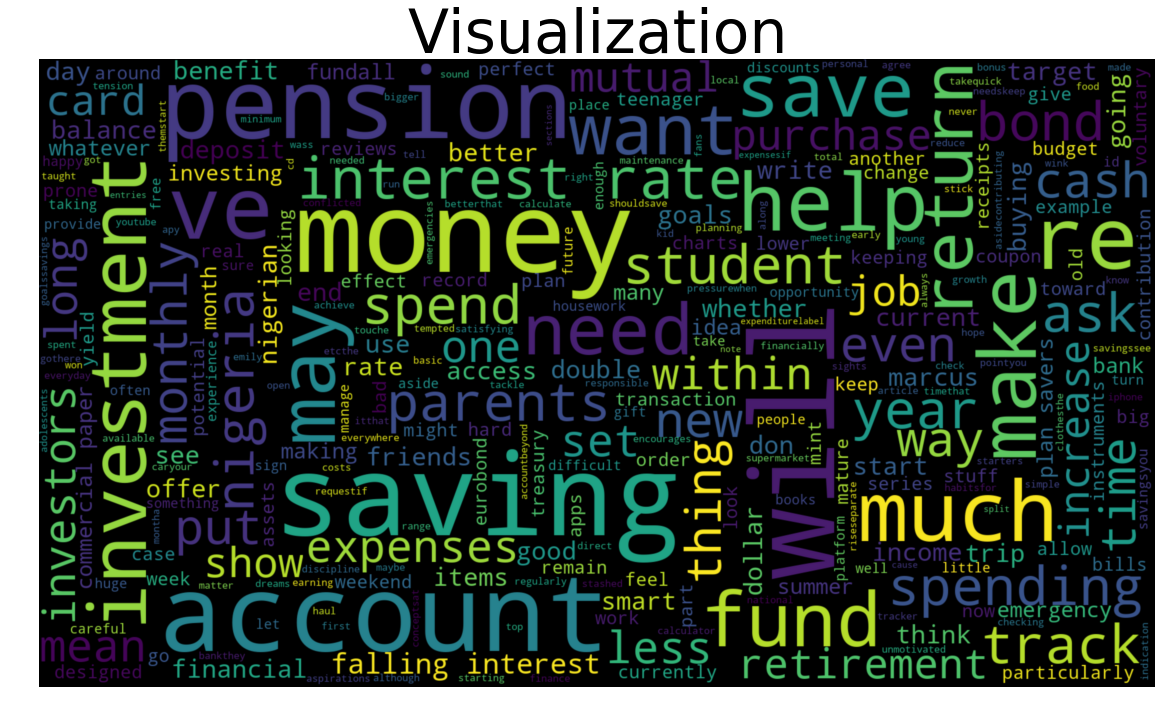

In [16]:
# Use the function to visualize
wordcloud(str_, "Visualization") 

### The words appearing around Investments and savings are okay, the depict no sign of negativity.

# Sentiment Analysis.

In [17]:
sia = SIA()  # Instantiate the SentimentIntensityAnalyzer model
review = []

for line in invest['Final_form']:
    polarity_score = sia.polarity_scores(line) # check the extent to which a sentence is either positive, negative and neurtral a sentence is.
    polarity_score['review'] = line #  Extract the analyzed sentence.
    review.append(polarity_score)  # append every sentence and its score respectively to a review list. 
    
review # displaying our scores.

[{'neg': 0.052,
  'neu': 0.712,
  'pos': 0.236,
  'compound': 0.7096,
  'review': 'it s hard to save money as a teenager  particularly when you have friends who are out on weekend trips and buying new clothes'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'review': 'the article is part of a series where adolescents are taught basic personal finance concepts'},
 {'neg': 0.0,
  'neu': 0.629,
  'pos': 0.371,
  'compound': 0.8625,
  'review': 'at money under  we agree that being financially responsible is never too early  we hope this series will be a good starting point'},
 {'neg': 0.0,
  'neu': 0.822,
  'pos': 0.178,
  'compound': 0.6369,
  'review': 'you have big dreams as a kid  whether it s a new iphone  the trip you ve set your sights on  or bigger aspirations like buying your first car'},
 {'neg': 0.0,
  'neu': 0.805,
  'pos': 0.195,
  'compound': 0.7422,
  'review': 'your parents may help you get some of these things along the way but saving your own money toward

In [18]:
# convert the review list to a pandas frame.
folder = pd.DataFrame.from_records(review)
folder.head()

,compound,neg,neu,pos,review
0,0.7096,0.052,0.712,0.236,it s hard to save money as a teenager particu...
1,0.0000,0.000,1.000,0.000,the article is part of a series where adolesce...
2,0.8625,0.000,0.629,0.371,at money under we agree that being financiall...
3,0.6369,0.000,0.822,0.178,you have big dreams as a kid whether it s a n...
4,0.7422,0.000,0.805,0.195,your parents may help you get some of these th...


# Since the compound value gives a single value sentiment score, we would create a threshold such that  if the compound score is greater than 0.1 it is positive, if less than -0.1 it is negative.


In [19]:
folder['grade'] = 0
folder.loc[folder['compound'] > 0.1, 'grade'] = 1
folder.loc[folder['compound'] < -0.1, 'grade'] = -1
folder.head()

,compound,neg,neu,pos,review,grade
0,0.7096,0.052,0.712,0.236,it s hard to save money as a teenager particu...,1
1,0.0000,0.000,1.000,0.000,the article is part of a series where adolesce...,0
2,0.8625,0.000,0.629,0.371,at money under we agree that being financiall...,1
3,0.6369,0.000,0.822,0.178,you have big dreams as a kid whether it s a n...,1
4,0.7422,0.000,0.805,0.195,your parents may help you get some of these th...,1


In [20]:
# Drop the negative, compound, neutral and positive columns.
folder.drop(['compound'], axis = 1, inplace = True)
folder.drop(['neg'], axis = 1, inplace = True)
folder.drop(['neu'], axis = 1, inplace = True)
folder.drop(['pos'], axis = 1, inplace = True)

In [21]:
folder.head()

,review,grade
0,it s hard to save money as a teenager particu...,1
1,the article is part of a series where adolesce...,0
2,at money under we agree that being financiall...,1
3,you have big dreams as a kid whether it s a n...,1
4,your parents may help you get some of these th...,1


In [22]:
# we wont be focusing on neutral words which is indicated by a grade value of 0, hence, I removed them.
new_folder = folder[(folder.grade == 1) | (folder.grade == -1)]
new_folder.head()

,review,grade
0,it s hard to save money as a teenager particu...,1
2,at money under we agree that being financiall...,1
3,you have big dreams as a kid whether it s a n...,1
4,your parents may help you get some of these th...,1
5,start a savings account as young youtube fans ...,1


# RESULTS:

In [23]:
print("Positive reviews:\n")
print(list(new_folder[new_folder['grade'] == 1].review)[:6])


Positive reviews:

['it s hard to save money as a teenager  particularly when you have friends who are out on weekend trips and buying new clothes', 'at money under  we agree that being financially responsible is never too early  we hope this series will be a good starting point', 'you have big dreams as a kid  whether it s a new iphone  the trip you ve set your sights on  or bigger aspirations like buying your first car', 'your parents may help you get some of these things along the way but saving your own money toward these goals makes it more satisfying to achieve them', 'start a savings account as young youtube fans like emily wass will tell you  if you re not earning much  you might feel conflicted or unmotivated to put money into your savings account but it can benefit no matter if this is   or  ', 'quick savings tracker investment growth and interest savings']


In [24]:
print("\nNegative reviews:\n")
print(list(new_folder[new_folder['grade'] ==-1].review)[:6])


Negative reviews:

['they currently offer an apy of   which is in the top   of all national banks and there is no minimum deposit needed to open the account', 'there are no monthly maintenance costs for the marcus savings account and your account balance will only rise', 'separate spending money from savings although you ve stashed the money you ve made on a savings account  maybe you re tempted to think if you ve run out of cash right  no — touche it not ', 'when you see some of the figures besides things you ve ordered  you may realize just how dumb it was', 'whether it s a bad film you ve watched  or a party that has bored you to death  your spending is more likely to be watchful and cautious', 'nigeria’s pension fund investors and pension savers should be worried in ']


In [25]:
# Get the number of negative thoughts and positive thoughts around savings and investmennts.
print(new_folder.grade.value_counts())

 1    68
-1    19
Name: grade, dtype: int64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

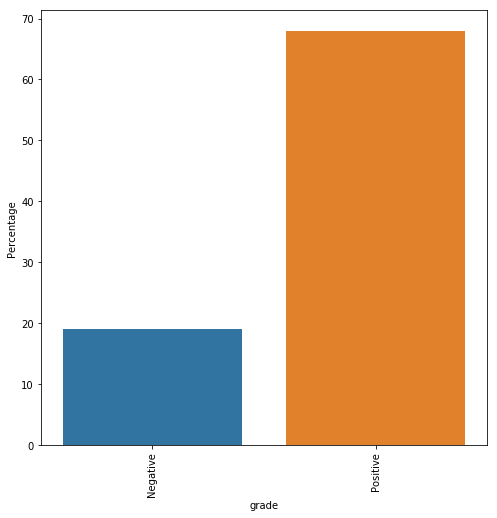

In [26]:
# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
g = sns.countplot(new_folder.grade * 100)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.xticks(rotation = 90)

 # Based on the visualization of the data set, it can be seen that idea on savings and investments is widely accepted. 